This code uses SyMBac to generate synthetic image for Omnipose Training.

In [1]:
%load_ext autoreload 
%autoreload 2

In [1]:
import sys
sys.path.insert(1, r"D:\SyMBac-main\SyMBac-main") # Not needed if you installed SyMBac using pip
# import sys
# sys.path.insert(1, r"D:\SyMBac-main\SyMBac-main\SyMBac")
# print(sys.path)

# import os
# print(os.listdir(r"D:\SyMBac-main\SyMBac-main\SyMBac"))




from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]

(251, 35, 3, 100, 30)


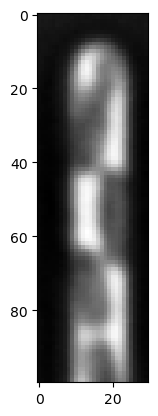

In [163]:
import zarr
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np

# z1 = zarr.open('/home/rl627/SSD1/20231207_Cm_SB13/trenches_wide_long.zarr', mode='r')
z1 = z1 = zarr.open(r'D:\PRISM\trenches_0000growth.zarr', mode='r')
print(z1.shape)
trench = 200
N = 5
real_image1 = z1[trench, N, 0, :, :]
real_image1 = np.array(real_image1)

# # Read Images
# real_image1 = mpimg.imread('/home/rl627/SSD1/20240521_massimo_benchmark_data/2000/2000/001124.png')
# real_image1 = np.array(Image.open('/home/rl627/SSD1/20240521_massimo_benchmark_data/2000/2000/000720.png').convert('L'))
plt.imshow(real_image1,cmap="Greys_r")
plt.show()

In [165]:
my_simulation = Simulation(
    trench_length = 9.0,
    trench_width = 1.6,
    cell_max_length = 4.8, #6, long cells # 1.65 short cells
    cell_width = 1.25, #1 long cells # 0.95 short cells
    sim_length = 100,
    pix_mic_conv = 0.10787, #0.065,# 0.10787,
    gravity = 0.,
    phys_iters = 1000,
    max_length_var = 0.3,
    width_var = 0.5,
    lysis_p = 0.,
    save_dir="./tmp/",
    resize_amount = 3
)

# my_simulation = Simulation(
#     trench_length = 6.2,
#     trench_width = 1.5,
#     cell_max_length = 3.8, #6, long cells # 1.65 short cells
#     cell_width = 1.05, #1 long cells # 0.95 short cells
#     sim_length = 100,
#     pix_mic_conv = 0.10787, #0.065,# 0.10787,
#     gravity = 0.,
#     phys_iters = 1000,
#     max_length_var = 1.2,
#     width_var = 0.6,
#     lysis_p = 0.,
#     save_dir="./tmp/",
#     resize_amount = 3
# )

In [166]:
my_simulation.run_simulation(show_window=False)
my_simulation.draw_simulation_OPL(do_transformation =True, label_masks = True)

  0%|          | 0/102 [00:00<?, ?it/s]

Extracting cell properties from the simulation:   0%|          | 0/100 [00:00<?, ?it/s]

Rendering cell optical path lengths:   0%|          | 0/100 [00:00<?, ?it/s]

In [134]:
# my_simulation.draw_simulation_OPL(do_transformation = False, label_masks = True)

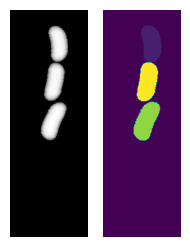

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(2,5))
ax1.imshow(my_simulation.OPL_scenes[-1], cmap="Greys_r")
ax1.axis("off")
ax2.imshow(my_simulation.masks[-1])
ax2.axis("off")
plt.tight_layout()

In [168]:
my_simulation.visualise_in_napari()

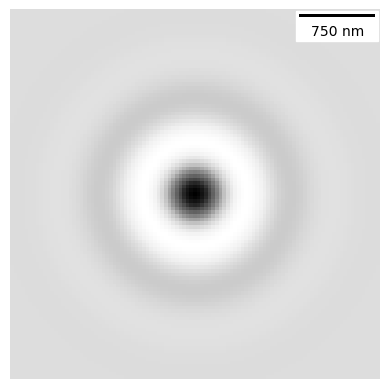

In [169]:
# A phase contrast kernel
# my_kernel = PSF_generator(
#     radius = 50,
#     wavelength = 0.632,
#     NA = 0.95,
#     n = 1,
#     resize_amount = 3,
#     pix_mic_conv = 0.065, #0.10787,
#     apo_sigma = 10,
#     mode="phase contrast",
#     condenser = "Ph3")
# my_kernel.calculate_PSF()
# my_kernel.plot_PSF()

# A phase contrast kernel
my_kernel = PSF_generator(
    radius = 50,
    wavelength = 0.75,
    NA = 0.95,
    n = 1,
    resize_amount = 3,
    pix_mic_conv = 0.10787, #0.065,
    apo_sigma = 20,
    mode="phase contrast",
    condenser = "Ph3")
my_kernel.calculate_PSF()
my_kernel.plot_PSF()

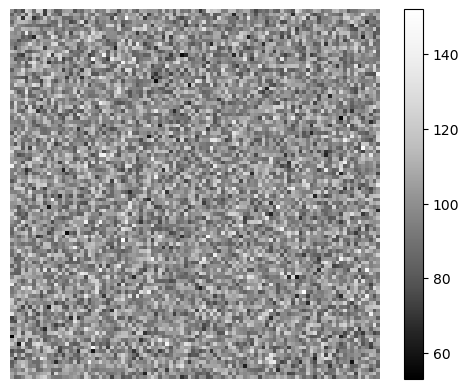

In [170]:
my_camera = Camera(baseline=100, sensitivity=2.9, dark_noise=8)
my_camera.render_dark_image(size=(100,100));

In [171]:
my_renderer = Renderer(simulation = my_simulation, PSF = my_kernel, real_image = real_image1, camera = my_camera, additional_real_images = None)

3 (520, 170)


In [172]:
my_renderer.select_intensity_napari(cells = "dark")

In [173]:
my_renderer.optimise_synth_image(manual_update=False)

# can set match_hist to false
# set media high value
# cell multiplier increases blackness and blurriness
# sigma low will make background black


interactive(children=(IntSlider(value=75, description='media_multiplier', max=300, min=-300), FloatSlider(valu…

In [174]:
my_renderer.generate_training_data(sample_amount=0.1, randomise_hist_match=False, randomise_noise_match=False, burn_in=2, n_samples = 300, save_dir="SyMBacData/60x_pc_20250528", in_series=False, prefix="0004")

Rendering synthetic images: 0it [00:00, ?it/s]

In [ ]:
12